In [1]:
# data Analysis
import pandas as pd
import numpy as np
import random as rng

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


#SciKit Learn Models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from sklearn.model_selection import train_test_split,learning_curve
import itertools
from rfpimp import importances,plot_importances

In [2]:
from subprocess import check_output
print(check_output(["ls", "Scrapers/data"]).decode("utf8"))
data = pd.read_csv("Scrapers/data/finalout.csv")

2to1.py
edit_json_template.py
fighter_profile_template.json
fight_json
finalout.csv
json_with_other_template
move_files.py
profile_json
profile_links
results_record.json
time_bound_profiles



In [3]:
data.describe()

,BPrev,BStreak,B_Age,B_Height,B_ID,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2301.000000,2301.000000,2318.000000,2306.000000,1647.000000,1647.000000,1647.000000,1647.000000,...,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000
mean,2.391286,0.744607,31.776184,177.327249,2120.001726,73.699480,0.074681,1.103825,0.577413,3.852459,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
std,2.539978,1.145596,4.165267,8.807620,705.089725,15.425347,0.305691,1.537946,1.049758,5.261864,...,197.588561,75.756504,100.516057,25.786323,13.039241,12.810181,39.171198,199.940529,20.941919,224.848078
min,0.000000,0.000000,20.000000,152.000000,129.000000,52.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,1910.250000,61.000000,0.000000,0.000000,0.000000,0.000000,...,137.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,137.000000,0.000000,178.000000
50%,2.000000,0.000000,31.000000,177.000000,2230.000000,70.000000,0.000000,1.000000,0.000000,2.000000,...,222.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,258.500000,0.000000,296.500000
75%,4.000000,1.000000,35.000000,182.000000,2709.000000,84.000000,0.000000,2.000000,1.000000,5.000000,...,299.000000,34.000000,98.000000,0.000000,0.000000,0.000000,2.000000,300.000000,0.000000,364.000000
max,14.000000,10.000000,48.000000,213.000000,3196.000000,120.000000,3.000000,13.000000,8.000000,47.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [4]:
data.describe(include=['O'])

,B_HomeTown,B_Location,B_Name,Date,R_HomeTown,R_Location,R_Name,winby,winner
count,2301,2305,2318,2318,2293,2294,2318,2282,2318
unique,724,567,949,389,652,504,842,3,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Kevin Lee,10/08/2018,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Donald Cerrone,DEC,red
freq,46,58,11,76,65,99,14,1111,1327


### Some Notes to observe
- Red Side seems to win slightly more than blue (1372/2318 = 59.188%)
- Donald Cerrone fights on Red side more than any other fighter, with 14 fights
- Kevin Lee fights on Blue side more than any other fighter with 11
- Most Fights are won by decision
- The Most common hometown and training location for fighters is Rei De Janeiro in Brazil

In [5]:
data.head()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [6]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
2313,7,0,34.0,172.0,"El Paso, Texas United States",1137,"Coconut Creek, Florida United States",Nik Lentz,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,blue
2314,9,1,31.0,177.0,"Milwaukee, Wisconsin United States",1069,"Milwaukee, Wisconsin United States",Anthony Pettis,70.0,3.0,...,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,KO/TKO,red
2315,5,3,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
2316,1,0,37.0,170.0,"Moses Lake, Washington United States",1200,"Houston, Texas United States",Tonya Evinger,61.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
2317,0,0,23.0,190.0,"Los Angeles, California United States",3072,"Fontana, California United States",Jalin Turner,70.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red


In [7]:
data.fillna(value=0,inplace=True)

In [8]:
data.tail()

,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
2313,7,0,34.0,172.0,"El Paso, Texas United States",1137,"Coconut Creek, Florida United States",Nik Lentz,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,blue
2314,9,1,31.0,177.0,"Milwaukee, Wisconsin United States",1069,"Milwaukee, Wisconsin United States",Anthony Pettis,70.0,3.0,...,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,KO/TKO,red
2315,5,3,35.0,180.0,Amazonas Brazil,2101,Rio de Janeiro Brazil,Alan Patrick,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red
2316,1,0,37.0,170.0,"Moses Lake, Washington United States",1200,"Houston, Texas United States",Tonya Evinger,61.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red
2317,0,0,23.0,190.0,"Los Angeles, California United States",3072,"Fontana, California United States",Jalin Turner,70.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,KO/TKO,red


In [9]:
dropdata = data.drop(['B_ID','B_Name','R_ID','R_Name','winby','Date'],axis=1)
dropdata.rename(columns={'BPrev':'B__Prev',
                         'RPrev':'R__Prev',
                         'B_Age':'B__Age',
                         'B_Height':'B__Height',
                         'B_Weight':'B__Weight',
                         'R_Age':'R__Age',
                         'R_Height':'R__Height',
                         'R_Weight':'R__Weight',
                         'BStreak':'B__Streak',
                         'RStreak': 'R__Streak'},inplace=True)
dropdata.describe()

,B__Prev,B__Streak,B__Age,B__Height,B__Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,...,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,2.391286,0.744607,31.543141,176.026747,73.317947,0.053063,0.784297,0.410267,2.737274,1.177739,...,29.284297,3.918896,7.559965,0.798533,0.463330,0.501294,1.399051,30.603969,0.510354,35.305436
std,2.539978,1.145596,4.957445,17.493625,16.269428,0.259871,1.389608,0.922747,4.766856,2.192778,...,105.072644,27.979205,40.083680,9.057408,4.622587,4.578076,13.892178,108.390717,7.272762,123.807764
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,29.000000,172.000000,61.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,31.000000,177.000000,70.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,1.000000,35.000000,182.000000,84.000000,0.000000,1.000000,0.000000,4.000000,1.750000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,14.000000,10.000000,48.000000,213.000000,120.000000,3.000000,13.000000,8.000000,47.000000,20.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [10]:
dropdata.describe(include=['O'])

,B_HomeTown,B_Location,R_HomeTown,R_Location,winner
count,2318,2318,2318,2318,2318
unique,725,568,653,505,4
top,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Rio de Janeiro Brazil,Rio de Janeiro Brazil,red
freq,46,58,65,99,1327


In [11]:
objecttypes = list(dropdata.select_dtypes(include=['O']).columns)
for col in objecttypes:
    dropdata[col] = dropdata[col].astype('category')

In [12]:
cat_columns = dropdata.select_dtypes(['category']).columns
dropdata[cat_columns] = dropdata[cat_columns].apply(lambda x: x.cat.codes)
dropdata.info()
dropdata.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2318 entries, 0 to 2317
Columns: 888 entries, B__Prev to winner
dtypes: float64(876), int16(4), int64(7), int8(1)
memory usage: 15.6 MB


,B__Prev,B__Streak,B__Age,B__Height,B_HomeTown,B_Location,B__Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
2313,7,0,34.0,172.0,173,114,70.0,0.0,3.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2314,9,1,31.0,177.0,389,324,70.0,3.0,6.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,298.0,0.0,298.0,3
2315,5,3,35.0,180.0,20,413,70.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2316,1,0,37.0,170.0,400,230,61.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2317,0,0,23.0,190.0,347,183,70.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [13]:
dropdata.head()

,B__Prev,B__Streak,B__Age,B__Height,B_HomeTown,B_Location,B__Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,...,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winner
0,0,0,38.0,193.0,254,11,120.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0,0,36.0,172.0,115,99,65.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0,0,39.0,167.0,278,422,61.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
3,0,0,33.0,167.0,553,432,56.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0,0,36.0,185.0,596,465,84.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


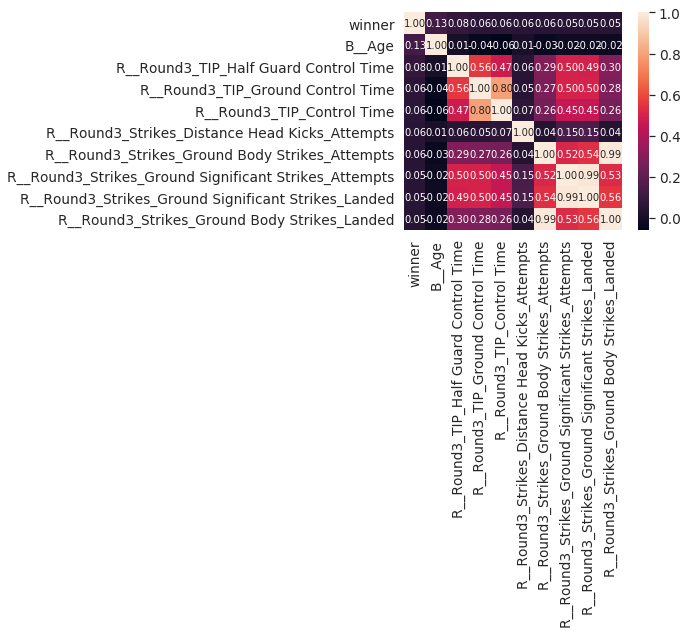

In [14]:
k = 10 #number of variables for heatmap
corrmat = dropdata.corr()
cols = corrmat.nlargest(k, 'winner')['winner'].index
cm = np.corrcoef(dropdata[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [15]:
def plot_cm(cm,title): 
    plt.figure()
    labels = ['Blue','D','N','Red']
    plt.imshow(cm, interpolation='nearest',cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45)
    plt.yticks(tick_marks, labels)
    
    fmt = 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()

In [16]:
X_all = dropdata.drop(['winner'], axis=1)
y_all = dropdata['winner']

In [17]:
np.unique(y_all.values,return_counts=True)

(array([0, 1, 2, 3], dtype=int8), array([ 951,   16,   24, 1327]))

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(X_all, y_all, test_size=0.2, random_state=0)

In [19]:
randomfor = RandomForestClassifier(max_features="sqrt", n_estimators = 700, max_depth = None, n_jobs=-1)
randomfor.fit(X_train,Y_train)
Y_pred = randomfor.predict(X_test)

In [20]:
accuracy_score(Y_test,Y_pred)

0.5969827586206896

(array([0, 1, 2, 3], dtype=int8), array([190,   3,   3, 268]))


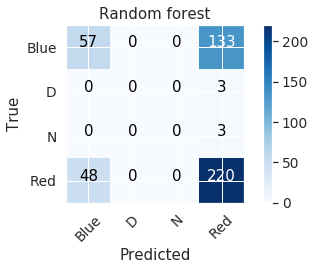

In [21]:
print(np.unique(Y_test.values,return_counts=True))
plot_cm(confusion_matrix(Y_test,Y_pred),"Random forest") 

In [22]:
perceptron = Perceptron(max_iter = 1000, tol = 0.001)
perceptron.fit(X_train,Y_train)
Y_pred = perceptron.predict(X_test)

In [23]:
accuracy_score(Y_test,Y_pred)

0.41379310344827586

(array([0, 1, 2, 3], dtype=int8), array([190,   3,   3, 268]))


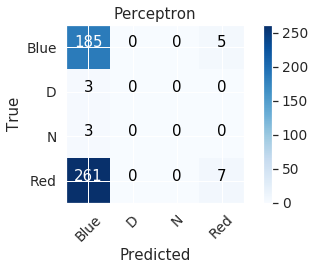

In [24]:
print(np.unique(Y_test.values,return_counts=True))
plot_cm(confusion_matrix(Y_test,Y_pred),"Perceptron") 

In [25]:
linear_svc = SVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [26]:
accuracy_score(Y_test,Y_pred)

0.5775862068965517

(array([0, 1, 2, 3], dtype=int8), array([190,   3,   3, 268]))


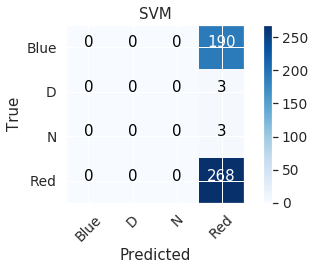

In [27]:
print(np.unique(Y_test.values,return_counts=True))
plot_cm(confusion_matrix(Y_test,Y_pred),"SVM") 

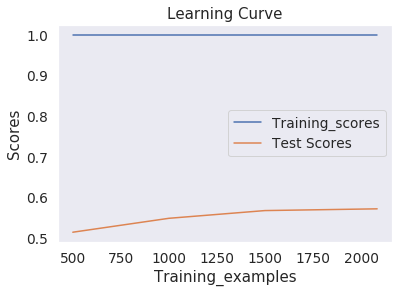

In [29]:
randomfor = RandomForestClassifier(max_features="sqrt", n_estimators = 700, max_depth = None, n_jobs=-1)
train_sizes,train_scores,test_scores = learning_curve(randomfor,X_all,y_all,cv=10,train_sizes=[500,1000,1500,2084])
train_scores_mean = np.mean(train_scores,axis=1)
test_scores_mean = np.mean(test_scores,axis=1)
plt.grid()
plt.xlabel("Training_examples")
plt.ylabel("Scores")
plt.plot(train_sizes,train_scores_mean,label="Training_scores")
plt.plot(train_sizes,test_scores_mean,label="Test Scores")
plt.legend(loc="best")
plt.title("Learning Curve")
plt.show()

In [30]:
randomfor = RandomForestClassifier(max_features="sqrt", n_estimators = 700, max_depth = None, n_jobs=-1)
randomfor.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=700, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
imp = importances(randomfor, X_test, Y_test)

/home/hitkul/anaconda3/envs/ufc/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


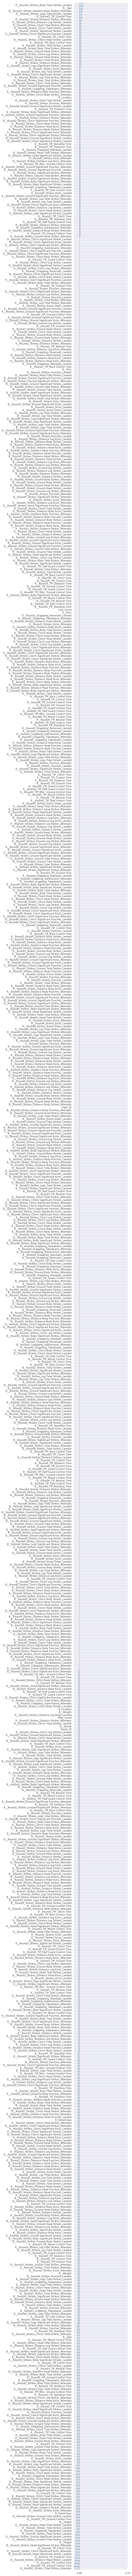

In [33]:
viz = plot_importances(imp)